In [331]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [332]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import explained_variance_score
from sklearn.metrics import max_error
from sklearn.preprocessing import OneHotEncoder
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [333]:
import click
import logging
from dotenv import find_dotenv, load_dotenv
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import json
import pathlib
from pathlib import Path

In [334]:
import pathlib
from plotnine import *
from plotnine.data import *
import plotnine
import numpy as np
import plotnine as gg
import pandas as pd
import numpy as np

In [335]:
path_bike_df = pathlib.Path("../data/raw/hour.csv")

In [336]:
bike_df = pd.read_csv(path_bike_df)

In [337]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
instant       17379 non-null int64
dteday        17379 non-null object
season        17379 non-null int64
yr            17379 non-null int64
mnth          17379 non-null int64
hr            17379 non-null int64
holiday       17379 non-null int64
weekday       17379 non-null int64
workingday    17379 non-null int64
weathersit    17379 non-null int64
temp          17379 non-null float64
atemp         17379 non-null float64
hum           17379 non-null float64
windspeed     17379 non-null float64
casual        17379 non-null int64
registered    17379 non-null int64
cnt           17379 non-null int64
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [338]:
bike_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [339]:
bike_df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
instant,17379,NaN,NaN,NaN,8690,5017.03,1,4345.5,8690,13034.5,17379
dteday,17379,731,2012-11-20,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
season,17379,NaN,NaN,NaN,2.50164,1.10692,1,2,3,3,4
yr,17379,NaN,NaN,NaN,0.502561,0.500008,0,0,1,1,1
mnth,17379,NaN,NaN,NaN,6.53778,3.43878,1,4,7,10,12
hr,17379,NaN,NaN,NaN,11.5468,6.91441,0,6,12,18,23
holiday,17379,NaN,NaN,NaN,0.0287704,0.167165,0,0,0,0,1
weekday,17379,NaN,NaN,NaN,3.00368,2.00577,0,1,3,5,6
workingday,17379,NaN,NaN,NaN,0.682721,0.465431,0,0,1,1,1
weathersit,17379,NaN,NaN,NaN,1.42528,0.639357,1,1,1,2,4


In [340]:
bike_df.count()

instant       17379
dteday        17379
season        17379
yr            17379
mnth          17379
hr            17379
holiday       17379
weekday       17379
workingday    17379
weathersit    17379
temp          17379
atemp         17379
hum           17379
windspeed     17379
casual        17379
registered    17379
cnt           17379
dtype: int64

In [341]:
import plotnine as gg
import numpy as np
 
for col in bike_df.columns:
    path = "../reports/figures" + col + ".png"
    hist = gg.ggplot(bike_df, gg.aes(x=col)) + gg.geom_histogram()
    #print(age_hist + gg.theme_bw())
    hist.save(path)

C:\Users\ugnej\Anaconda3\envs\bank-tele\lib\site-packages\plotnine\ggplot.py:706: UserWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units))
C:\Users\ugnej\Anaconda3\envs\bank-tele\lib\site-packages\plotnine\ggplot.py:707: UserWarning: Filename: ../reports/figuresinstant.png
  warn('Filename: {}'.format(filename))
C:\Users\ugnej\Anaconda3\envs\bank-tele\lib\site-packages\plotnine\scales\scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
C:\Users\ugnej\Anaconda3\envs\bank-tele\lib\site-packages\plotnine\stats\stat_bin.py:93: UserWarning: 'stat_bin()' using 'bins = 26'. Pick better value with 'binwidth'.
  warn(msg.format(params['bins']))
C:\Users\ugnej\Anaconda3\envs\bank-tele\lib\site-packages\plotnine\utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 an

C:\Users\ugnej\Anaconda3\envs\bank-tele\lib\site-packages\plotnine\utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return cbook.iterable(var) and not is_string(var)
C:\Users\ugnej\Anaconda3\envs\bank-tele\lib\site-packages\plotnine\ggplot.py:722: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.
  fig.savefig(filename, **fig_kwargs)
C:\Users\ugnej\Anaconda3\envs\bank-tele\lib\site-packages\plotnine\ggplot.py:706: UserWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units))
C:\Users\ugnej\Anaconda3\envs\bank-tele\lib\site-packages\plotnine\ggplot.py:707: UserWarning: Filename: ../reports/figuresweekday.png
  warn('Filename: {}'.format(filename))
C:\Users\ugnej\Anaconda3\envs\bank-tele\lib\site-packages\plotnine\scales\scale.py:93: MatplotlibDeprecationWarning: 
The iterable function 

C:\Users\ugnej\Anaconda3\envs\bank-tele\lib\site-packages\plotnine\utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return cbook.iterable(var) and not is_string(var)
C:\Users\ugnej\Anaconda3\envs\bank-tele\lib\site-packages\plotnine\ggplot.py:722: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.
  fig.savefig(filename, **fig_kwargs)
C:\Users\ugnej\Anaconda3\envs\bank-tele\lib\site-packages\plotnine\ggplot.py:706: UserWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units))
C:\Users\ugnej\Anaconda3\envs\bank-tele\lib\site-packages\plotnine\ggplot.py:707: UserWarning: Filename: ../reports/figurescasual.png
  warn('Filename: {}'.format(filename))
C:\Users\ugnej\Anaconda3\envs\bank-tele\lib\site-packages\plotnine\scales\scale.py:93: MatplotlibDeprecationWarning: 
The iterable function w

In [342]:
import matplotlib.pyplot as plt
import seaborn as sns

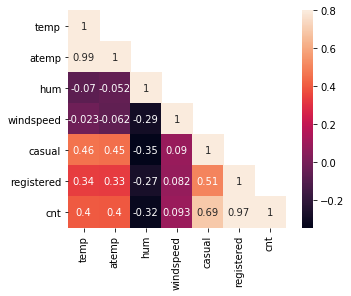

In [343]:
corrMatt = bike_df[['temp',
                    'atemp', 
                    'hum', 
                    'windspeed', 
                    'casual', 
                    'registered', 
                    'cnt']].corr()

mask = np.array(corrMatt)
# Turning the lower-triangle of the array to false
mask[np.tril_indices_from(mask)] = False
fig,ax = plt.subplots()
sns.heatmap(corrMatt, 
            mask=mask,
            vmax=.8, 
            square=True,
            annot=True,
            ax=ax)

In [344]:
bike_df.dropna().count()

instant       17379
dteday        17379
season        17379
yr            17379
mnth          17379
hr            17379
holiday       17379
weekday       17379
workingday    17379
weathersit    17379
temp          17379
atemp         17379
hum           17379
windspeed     17379
casual        17379
registered    17379
cnt           17379
dtype: int64

In [345]:
bike_df['dteday'] = pd.to_datetime(bike_df.dteday)

In [346]:
bike_df['season'] = bike_df.season.astype('category')
bike_df['holiday'] = bike_df.holiday.astype('category')
bike_df['weekday'] = bike_df.weekday.astype('category')
bike_df['weathersit'] = bike_df.weathersit.astype('category')
bike_df['workingday'] = bike_df.workingday.astype('category')
bike_df['mnth'] = bike_df.mnth.astype('category')
bike_df['yr'] = bike_df.yr.astype('category')
bike_df['hr'] = bike_df.hr.astype('category')


In [347]:
# Defining categorical variables encoder method
def fit_transform_ohe(df,col_name):
    """This function performs one hot encoding for the specified
column.
    Args:
        df(pandas.DataFrame): the data frame containing the mentioned column name
        col_name: the column to be one hot encoded
    Returns:
        tuple: label_encoder, one_hot_encoder, transformed column as pandas Series
    """
    # label encode the column
    le = preprocessing.LabelEncoder()
    le_labels = le.fit_transform(df[col_name])
    df[col_name+'_label'] = le_labels
    # one hot encoding
    ohe = preprocessing.OneHotEncoder()
    feature_arr = ohe.fit_transform(df[[col_name+'_label']]).toarray()
    feature_labels = [col_name+'_'+str(cls_label) for cls_label in le.classes_]
    features_df = pd.DataFrame(feature_arr, columns=feature_labels)
    return le,ohe,features_df

# given label encoder and one hot encoder objects, 
# encode attribute to ohe
def transform_ohe(df,le,ohe,col_name):
    """This function performs one hot encoding for the specified
        column using the specified encoder objects.

    Args:
        df(pandas.DataFrame): the data frame containing the mentioned column name
        le(Label Encoder): the label encoder object used to fit label encoding
        ohe(One Hot Encoder): the onen hot encoder object used to fit one hot encoding
        col_name: the column to be one hot encoded

    Returns:
        tuple: transformed column as pandas Series

    """
    # label encode
    col_labels = le.transform(df[col_name])
    df[col_name+'_label'] = col_labels
    
    # ohe 
    feature_arr = ohe.fit_transform(df[[col_name+'_label']]).toarray()
    feature_labels = [col_name+'_'+str(cls_label) for cls_label in le.classes_]
    features_df = pd.DataFrame(feature_arr, columns=feature_labels)
    
    return features_df

In [348]:
# Divide the dataset into training and testing sets
X, X_test, y, y_test = train_test_split(bike_df.iloc[:,0:-3],
                                        bike_df.iloc[:,-1],
                                        test_size=0.15,
                                        random_state=42)
X.reset_index(inplace=True)
y = y.reset_index()

x_test=X_test.reset_index(inplace=True)

y_test = y_test.reset_index()

In [349]:
y_test

,index,cnt
0,12830,425
1,8688,88
2,7091,4
3,12230,526
4,431,13
...,...,...
2602,6497,249
2603,1722,78
2604,14359,626
2605,1061,33


In [350]:
from sklearn import preprocessing

In [351]:
# Encoding all the categorical features
cat_attr_list = ['season','holiday',
                 'weathersit','workingday',
                 'hr','weekday','mnth','yr']
# though we have transformed all categoricals into their one-hot encodings, note that ordinal
# attributes such as hour, weekday, and so on do not require such encoding.
numeric_feature_cols = ['temp','hum','windspeed',
                        'hr','weekday','mnth','yr']
subset_cat_features =  ['season','holiday','weathersit','workingday']

###############
# Train dataset
###############
encoded_attr_list = []
for col in cat_attr_list:
    return_obj = fit_transform_ohe(X,col)
    encoded_attr_list.append({'label_enc':return_obj[0],
                              'ohe_enc':return_obj[1],
                              'feature_df':return_obj[2],
                              'col_name':col})


feature_df_list  = [X[numeric_feature_cols]]
feature_df_list.extend([enc['feature_df'] \
                        for enc in encoded_attr_list \
                        if enc['col_name'] in subset_cat_features])

train_df_new = pd.concat(feature_df_list, axis=1)
print("Train dataset shape::{}".format(train_df_new.shape))
print(train_df_new.head())

##############
# Test dataset
##############
test_encoded_attr_list = []
for enc in encoded_attr_list:
    col_name = enc['col_name']
    le = enc['label_enc']
    ohe = enc['ohe_enc']
    test_encoded_attr_list.append({'feature_df':transform_ohe(X_test,
                                                              le,ohe,
                                                              col_name),
                                   'col_name':col_name})
    
    
test_feature_df_list = [X_test[numeric_feature_cols]]
test_feature_df_list.extend([enc['feature_df'] \
                             for enc in test_encoded_attr_list \
                             if enc['col_name'] in subset_cat_features])

test_df_new = pd.concat(test_feature_df_list, axis=1) 
print("Test dataset shape::{}".format(test_df_new.shape))
print(test_df_new.head())

Train dataset shape::(14772, 19)
   temp   hum  windspeed  hr weekday mnth yr  season_1  season_2  season_3  \
0  0.48  0.94     0.2537  23       2   11  0       0.0       0.0       0.0   
1  0.68  0.69     0.1940   0       5    8  0       0.0       0.0       1.0   
2  0.44  0.67     0.0000  14       0   10  1       0.0       0.0       0.0   
3  0.30  0.65     0.0896   1       5   11  1       0.0       0.0       0.0   
4  0.26  0.60     0.1642  22       4    1  1       1.0       0.0       0.0   

   season_4  holiday_0  holiday_1  weathersit_1  weathersit_2  weathersit_3  \
0       1.0        1.0        0.0           0.0           1.0           0.0   
1       0.0        1.0        0.0           0.0           0.0           1.0   
2       1.0        1.0        0.0           0.0           1.0           0.0   
3       1.0        1.0        0.0           0.0           1.0           0.0   
4       0.0        1.0        0.0           1.0           0.0           0.0   

   weathersit_4  workin

C:\Users\ugnej\Anaconda3\envs\bank-tele\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\ugnej\Anaconda3\envs\bank-tele\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "cate

In [352]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score

In [353]:
X = train_df_new
y = y.cnt.values.reshape(-1,1)

lin_reg = linear_model.LinearRegression()

# using the k-fold cross validation (specifically 10-fold) to reduce overfitting affects
# cross_val_predict function returns cross validated prediction values as fitted by the model object.
predicted = cross_val_predict(lin_reg, X, y, cv=10)

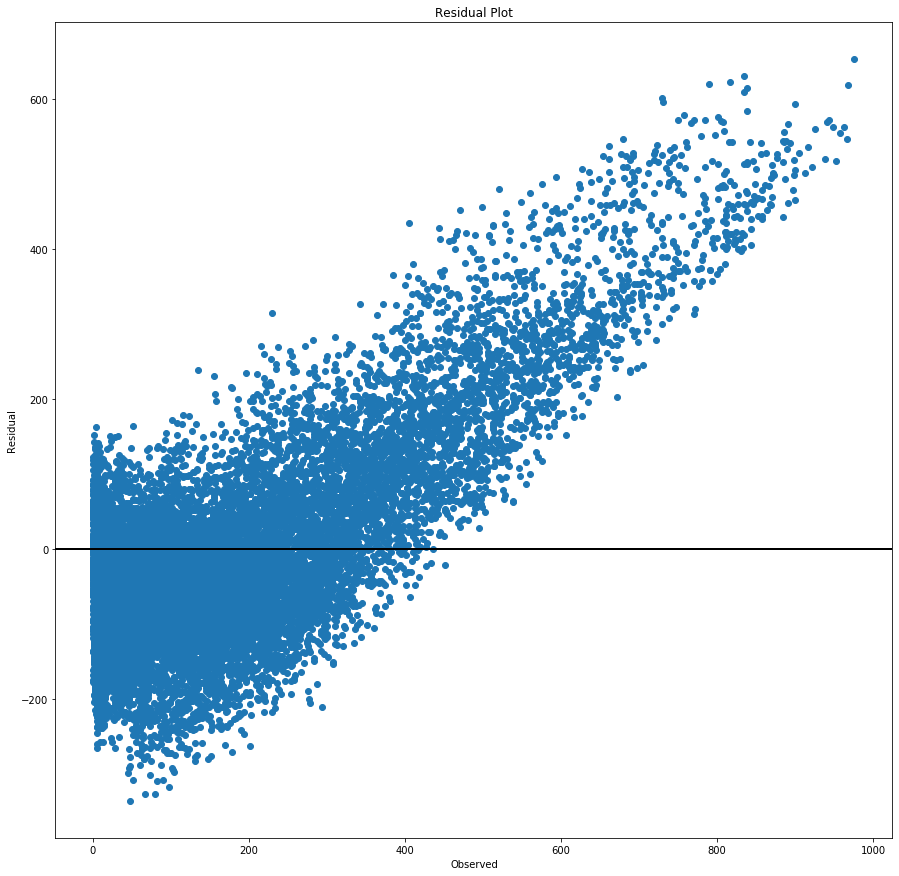

In [355]:
fig,ax = plt.subplots(figsize=(15,15))
ax.scatter(y, y-predicted)
ax.axhline(lw=2,color='black')
ax.set_xlabel('Observed')
ax.set_ylabel('Residual')
ax.set_title('Residual Plot')
plt.show()

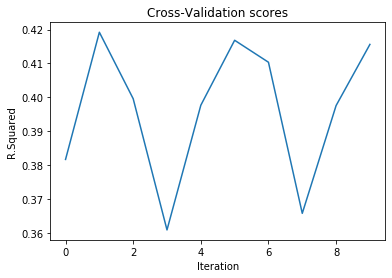

R-squared::[0.38169287 0.41920005 0.39959729 0.36090528 0.3976714  0.41683178
 0.41035281 0.36579261 0.39757158 0.41561405]
MSE::[-20831.86069745 -17577.43114687 -19767.44039237 -20246.3054627
 -19456.18382769 -18770.23069985 -20790.49880493 -22184.29294657
 -21441.81051798 -18732.01176695]


In [356]:
r2_scores = cross_val_score(lin_reg, X, y, cv=10)
mse = cross_val_score(lin_reg, X, y, cv=10,scoring='neg_mean_squared_error')

fig,ax = plt.subplots()
ax.plot(range(0,10),
        r2_scores)
ax.set_xlabel('Iteration')
ax.set_ylabel('R.Squared')
ax.set_title('Cross-Validation scores')
plt.show()


print("R-squared::{}".format(r2_scores))
print("MSE::{}".format(mse))

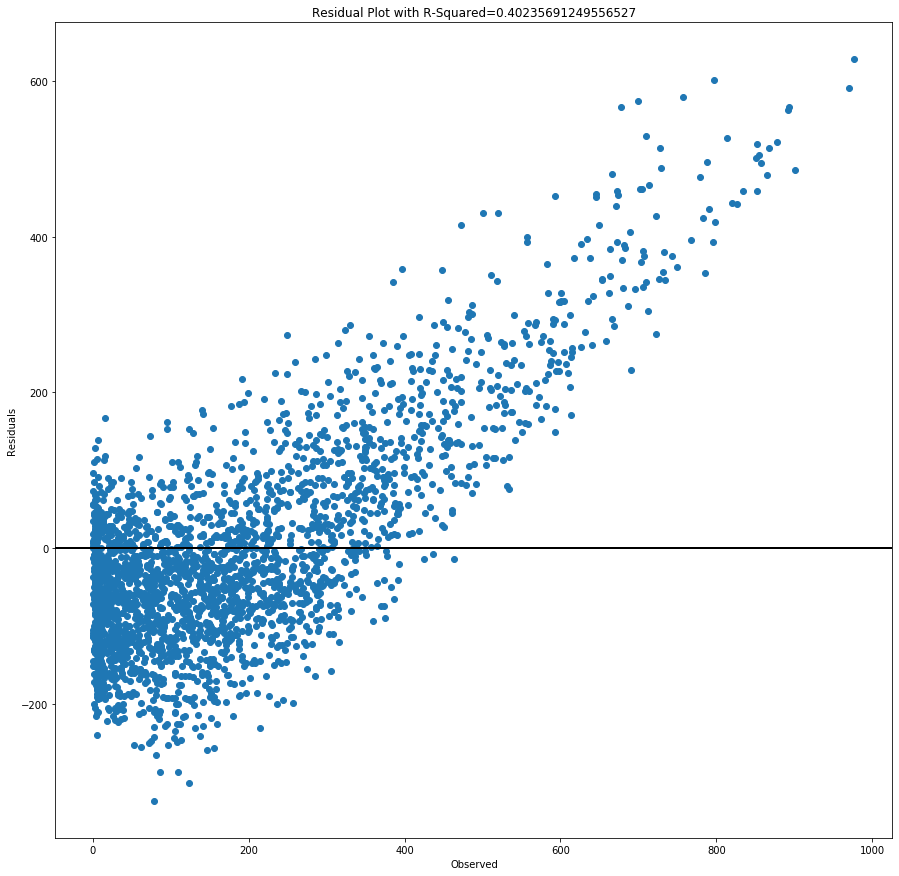

MSE: 18927.46046527832


In [358]:
# Predict model based on training dataset
lin_reg.fit(X,y)

# Constructing test dataset
X_test = test_df_new
y_test = y_test.cnt.values.reshape(-1,1)


y_pred = lin_reg.predict(X_test)
residuals = y_test-y_pred

fig, ax = plt.subplots(figsize=(15,15))
ax.scatter(y_test, residuals)
ax.axhline(lw=2,color='black')
ax.set_xlabel('Observed')
ax.set_ylabel('Residuals')
ax.title.set_text("Residual Plot with R-Squared={}".format(np.average(lin_reg.score(X_test,y_test))))
plt.show()

print("MSE: {}".format(metrics.mean_squared_error(y_test, y_pred)))

In [364]:
y_pred

array([[439.22003039],
       [193.71653264],
       [ 61.52935066],
       ...,
       [235.72287872],
       [220.78510854],
       [138.98045144]])